# Cropland Classification

In this notebook, we analyze the [UCI Cropland Mapping dataset](https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set). From the UCI Machine Learning Repository, "This data set is a fused bi-temporal optical-radar data for cropland classification. The images were collected by RapidEye satellites (optical) and the Unmanned Aerial Vehicle Synthetic Aperture Radar (UAVSAR) system (Radar) over an agricultural region near Winnipeg, Manitoba, Canada in 2012."

In other words, this data set provides satellite images of different cropland areas in Winnipeg, Manitoba, Canada. There is also a radar component to the dataset, but as it is a surprisingly large dataset, we will be excluding the radar portion here for simplification purposes. 

Import statements:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data 

There are 2 x 49 radar features and 2 x 38 optical features for two dates: 05 and 14 July 2012.
Seven crop type classes exist for this data set as follows: 
  * 1) Corn 
  * 2) Pea 
  * 3) Canola 
  * 4) Soybean
  * 5) Oat
  * 6) Wheat
  * 7) Broadleaf

Import data from current directory:

In [2]:
crops = pd.read_csv("./WinnipegDataset.txt")

Dropping columns labeled 'f1' to 'f98' (radar data columns) because we only want to use the image data.

In [3]:
crop_data = crops.drop(crops.iloc[:, 1:99], axis=1)
crop_data.head()

,label,f99,f100,f101,f102,f103,f104,f105,f106,f107,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,0.009,0.057,0.048,0.165,0.369,0.76978,7.6875,1.18750,0.50488,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,0.001,0.044,0.037,0.103,0.290,0.77370,7.8378,1.18920,0.42041,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,0.001,0.046,0.046,0.107,0.298,0.73256,6.4783,1.00000,0.40217,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,0.018,0.071,0.074,0.120,0.284,0.58659,3.8378,0.95946,0.32957,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,0.023,0.066,0.068,0.131,0.264,0.59036,3.8824,0.97059,0.32678,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [4]:
crop_data.shape

(325834, 77)

In [5]:
crop_data.describe()

,label,f99,f100,f101,f102,f103,f104,f105,f106,f107,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,0.005373,0.052990,0.037367,0.127367,0.416935,0.825873,18.178251,1.702412,0.586187,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,0.006708,0.025087,0.023287,0.039231,0.119339,0.115235,20.225461,0.842595,0.153944,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,-0.017964,0.964710,0.071429,-0.028535,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,0.001000,0.034000,0.017000,0.098000,0.322000,0.757060,7.232600,1.234000,0.469630,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,-0.000000,0.506170,0.357140
50%,4.000000,0.001000,0.044000,0.032000,0.111000,0.423000,0.846150,12.000000,1.500000,0.634270,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,0.009000,0.067000,0.054000,0.148000,0.497000,0.924190,25.381000,2.000000,0.701710,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,0.279000,0.341000,0.321000,0.342000,0.752000,0.996410,556.000000,34.000000,1.020000,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


## Data Analysis

So, for each of the classes, we have sample sizes:
   
   * corn: 39,162
   * pea: 3,598
   * canola: 75,673
   * soybean: 74,067
   * oat: 47,117
   * wheat: 85,074 
   * broadleaf: 1,143
   
out of the total number of samples, 325,834.


This is a little easier to understand if we can visualize it.

In [6]:
class_proportion = pd.Series(100 * crop_data.label.value_counts(normalize=True)).sort_index()
print('Class proportion\n')
for i in range(0,7):
    print(f'Class {class_proportion.index[i]}: {class_proportion.iloc[i]:.2f} %')

Class proportion

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


<BarContainer object of 7 artists>

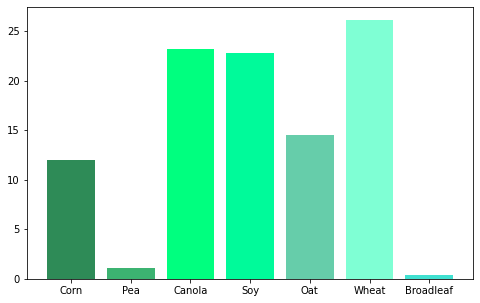

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'], class_proportion, color = ['seagreen','mediumseagreen','springgreen','mediumspringgreen','mediumaquamarine','aquamarine','turquoise'])

Cool, so it looks like the 'Pea' and 'Broadleaf' classes will be the most difficult to classify because we have fewer samples. I expect we will see that in the classification accuracy score for those two classes.

## Data Processing


Our data has one column for the class labels ('Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'), and 75 columns of features. I will be using an 80/20 train/test split and then a 70/30 train test split and comparing the two accuracies.

In [8]:
features = ['f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111',
                'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124',
                'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137',
                'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150',
                'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163',
                'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174']
X = crop_data[features]
T = crop_data.label

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size = 0.20)
print('Train/Test split: 80/20')
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Train/Test split: 80/20
Training Features Shape: (260667, 76)
Training Labels Shape: (260667,)
Testing Features Shape: (65167, 76)
Testing Labels Shape: (65167,)


In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, T, test_size = 0.30)
print('Train/Test split: 70/30')
print('Training Features Shape:', X_train2.shape)
print('Training Labels Shape:', y_train2.shape)
print('Testing Features Shape:', X_test2.shape)
print('Testing Labels Shape:', y_test2.shape)

Train/Test split: 70/30
Training Features Shape: (228083, 76)
Training Labels Shape: (228083,)
Testing Features Shape: (97751, 76)
Testing Labels Shape: (97751,)


Now that we've split the data, let's check how many samples we have to test on in each class:

In [11]:
class_count = pd.Series(y_test.value_counts()).sort_index()
print('Class count - Test labels: 80/20 split\n')
for i in range(0,7):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')

Class count - Test labels: 80/20 split

Class 1: 7787
Class 2: 699
Class 3: 15164
Class 4: 14876
Class 5: 9373
Class 6: 17037
Class 7: 231


In [12]:
class_count = pd.Series(y_test2.value_counts()).sort_index()
print('Class count - Test labels: 70/30 split\n')
for i in range(0,7):
    print(f'Class {class_count.index[i]}: {class_count.iloc[i]}')

Class count - Test labels: 70/30 split

Class 1: 11743
Class 2: 1141
Class 3: 22817
Class 4: 22212
Class 5: 14077
Class 6: 25405
Class 7: 356


In [13]:
yn_train = y_train.values
yn_test = y_test.values

In [14]:
yn_train2 = y_train2.values
yn_test2 = y_test2.values

In [15]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

## Goal
To classify the data into the classes listed above using a neural network classifier, a gradient boosting classifier, and a random forest classifier. Then we will analyze the accuracy of each of the classifiers and attempt to determine how the accuracy could be improved or why we may be getting that score.

In [16]:
acc = []
model = []

# Neural Network


Using multi-layer perceptron classifier (MLP-classifier) from sklearn

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [21]:
mlp = MLPClassifier()
nn = mlp.fit(X_train, yn_train)

In [22]:
nn_pred = nn.predict(X_test)
nn_acc = accuracy_score(yn_test, nn_pred, normalize=False)
print("Classification accuracy for 80/20 split is", nn_acc/len(yn_test))

Classification accuracy for 80/20 split is 0.9667316279712124


96.67% accuracy for 80/20 split, not bad! Let's see if a 70/30 split can improve that at all:

In [24]:
model.append(('Neural Network', 'Split: 70/30'))

In [25]:
mlp = MLPClassifier()
nn2 = mlp.fit(X_train2, yn_train2)

In [26]:
nn_pred2 = nn.predict(X_test2)
nn_acc2 = accuracy_score(yn_test2, nn_pred2, normalize=False)
print("Classification accuracy for 70/30 split is", nn_acc2/len(yn_test2))

Classification accuracy for 70/30 split is 0.9721332774089267


97.21% accuracy for 70/30 split! A slight improvement, but nothing too drastic.

# Gradient Boosting

In [29]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
grad_booster = GradientBoostingClassifier(learning_rate=0.1)

In [31]:
grad_booster.fit(X_train, yn_train)
grad_pred = grad_booster.predict(X_test)
print(classification_report(yn_test, grad_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      7787
           2       0.99      0.98      0.98       699
           3       1.00      1.00      1.00     15164
           4       0.98      0.99      0.98     14876
           5       0.85      0.85      0.85      9373
           6       0.92      0.92      0.92     17037
           7       0.81      0.67      0.73       231

    accuracy                           0.95     65167
   macro avg       0.93      0.91      0.92     65167
weighted avg       0.95      0.95      0.95     65167



In [32]:
grad_acc = grad_booster.score(X_test, yn_test)
print("Classification accuracy is", grad_acc)

Classification accuracy is 0.9498826092961161


Overall 94.9% accuracy for a 80/20 split! Classes 5 and 7 (oat and broadleaf) had the lowest classification accuracy. We expected to see this for the broadleaf and pea class because they have the lowest class shares, but the Pea class (class 2) came through with 98% accuracy. But oh my gosh that took forever to run and the accuracy is slightly lower than I had hoped for. 

# Random Forest

Here we are using the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from scikit Learn

In [37]:
from sklearn.ensemble import RandomForestClassifier

Let's try the Random Forest with an 80/20 split:

In [38]:
model.append(('Random Forest', 'Split: 80/20'))

In [39]:
forest = RandomForestClassifier()
forest = forest.fit(X_train, yn_train)

In [40]:
forest_predict = forest.predict(X_test)
forest_acc = accuracy_score(yn_test, forest_predict)
print("Classification accuracy is", forest_acc)

Classification accuracy is 0.9643070879432841


96.4% accuracy, not bad! Let's see how it performs with a 70/30 split:

In [43]:
forest2 = RandomForestClassifier()
forest2 = forest2.fit(X_train2, yn_train2)

In [44]:
forest_predict2 = forest2.predict(X_test2)
forest_acc2 = accuracy_score(yn_test2, forest_predict2)
print("Classification accuracy is", forest_acc2)

Classification accuracy is 0.9619236631850313


96.19% accuracy, a little worse that we got with the 80/20 split, but still better than the Gradient Booster!

# Results

In [45]:
model = ['Neural Network - Split: 80/20', 'Neural Network - Split: 70/30', 'Gradient Boosting - Split: 80/20', 'Random Forest - Split: 80/20', 'Random Forest - Split: 70/30']

In [46]:
acc = [nn_acc/len(yn_test), nn_acc2/len(yn_test2), grad_acc, forest_acc, forest_acc2]

In [49]:
results = pd.DataFrame((model, acc))
results

,0,1,2,3,4
0,Neural Network - Split: 80/20,Neural Network - Split: 70/30,Gradient Boosting - Split: 80/20,Random Forest - Split: 80/20,Random Forest - Split: 70/30
1,0.966732,0.972133,0.949883,0.964307,0.961924


I have been forced to conclude that the Gradient Boosting Classifier just isn't meant for a task like this. From the research that I've done since getting the first accuracy score, it seems like the Gradient Booster works best when it is just trying to classify data into two classes. Here we have 7, so I clearly chose the wrong tool for the job. I had also tried the Gradient Boosting Classifier with a 70/30 split, and got a 94.6% accuracy, but seeing as this is not the correct kind of classifier to be using, keeping that code was just cluttering up my notebook.

The good news is that the neural network works! It efficiently classifies the data with a high accuracy. I think my favorite classifier is the Random Forest, despite the accuracy being a little lower than the neural network. I have a little bit of experience using decision trees, and I think that the random forest implementation is a little more intuitive, not to mention faster! Even if the accuracy takes a bit of a hit. My personal preferences aside, the Neural Network with a 70/30 train/test split is the most accurate and was fairly efficient.

I have seen some other experiments in which the entire data set was used (including the radar data, which I chose to remove) and they were able to achieve a much higher accuracy (99.29%) with both a neural network implementation and a random forest classifier. 

## Sources
Breviglieri, Paulo. “Cropland Mapping - Random Forest &amp; Neural Network.” Kaggle, Kaggle, 9 Oct. 2020, https://www.kaggle.com/code/pcbreviglieri/cropland-mapping-random-forest-neural-network/notebook. 

Khosravi, Iman. “Crop Mapping Using Fused Optical-Radar Data Set.” UCI Machine Learning Repository, 16 June 2020, https://archive.ics.uci.edu/ml/datasets/Crop+mapping+using+fused+optical-radar+data+set.
